In [ ]:
# IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder
from scipy.special import boxcox1p

In [ ]:
# LOADING DATA
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 1. Text preprocessing

In [ ]:
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape))
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


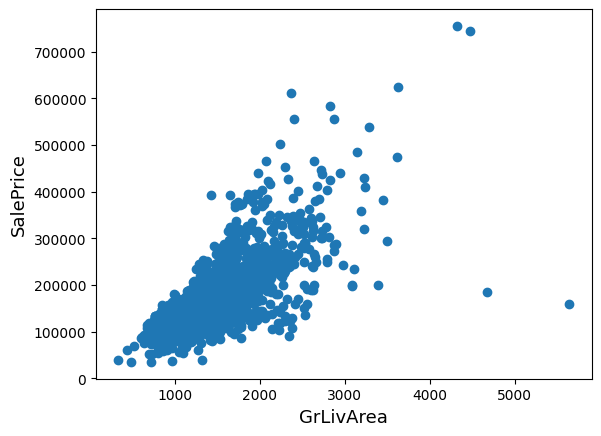

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

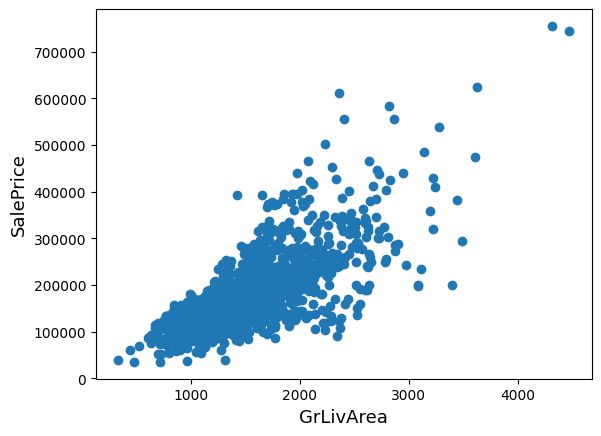

In [ ]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-2100723947.py:8: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],



 mu = 180932.92 and sigma = 79467.79



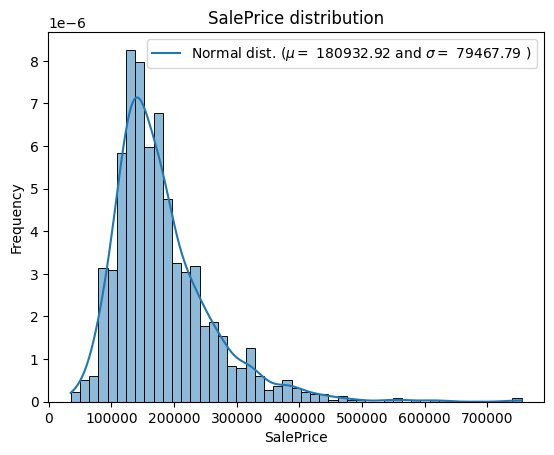

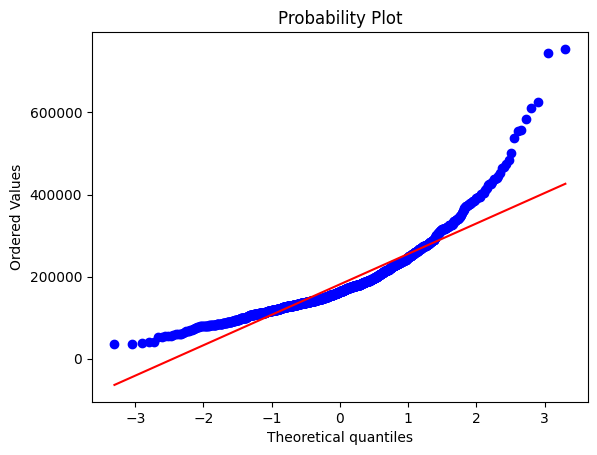

In [ ]:
sns.histplot(train['SalePrice'], kde=True, stat="density")

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-365950458.py:12: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],



 mu = 12.02 and sigma = 0.40



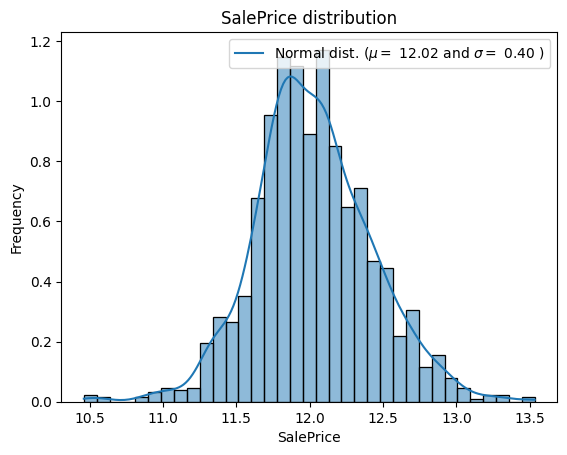

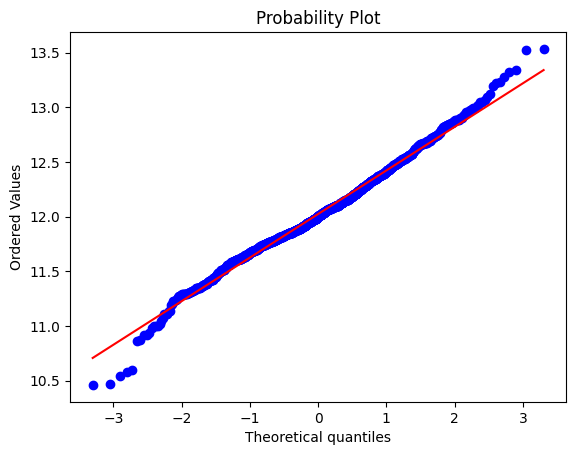

In [ ]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution
sns.histplot(train['SalePrice'], kde=True, stat="density")

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [ ]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


In [ ]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
MasVnrType,60.541652
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageYrBlt,5.450806
GarageCond,5.450806


Text(0.5, 1.0, 'Percent missing data by feature')

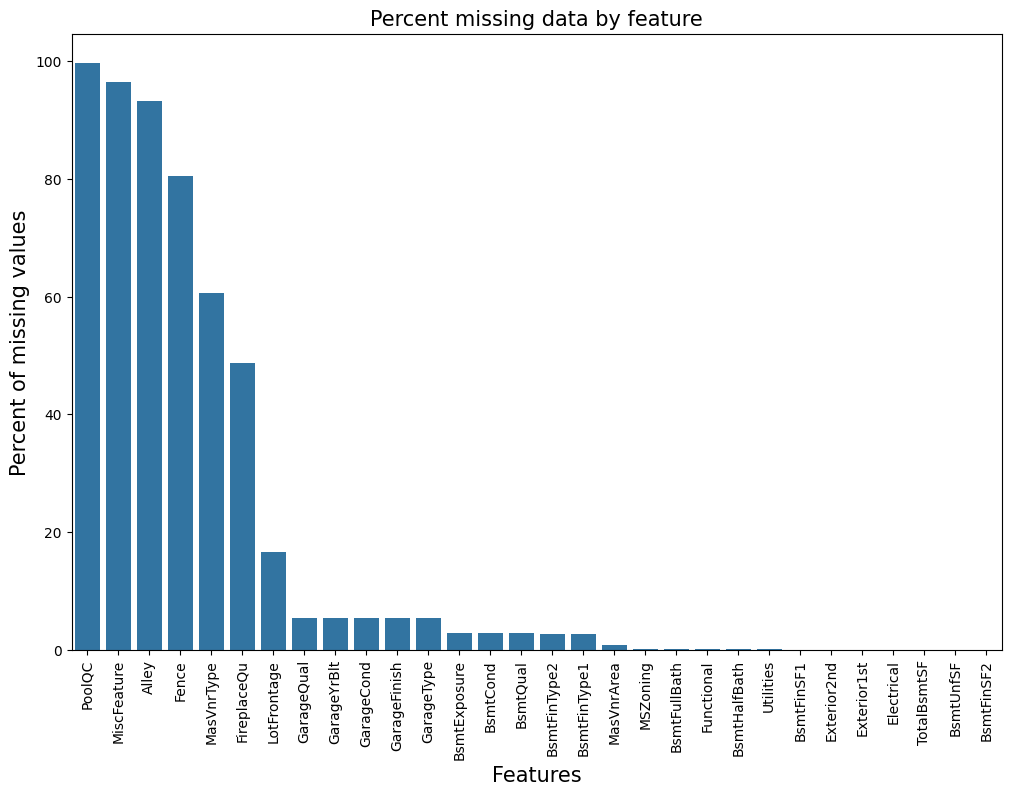

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='vertical')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [ ]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [ ]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [ ]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [ ]:
#Check remaining missing values if any
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [ ]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [ ]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1',
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond',
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


In [ ]:
# Adding total sqfootage feature
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [ ]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 59 skewed numerical features to Box Cox transform


In [ ]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [ ]:
train = all_data[:ntrain]
test = all_data[ntrain:]

# 2. Training 2 models


1.   Linear Regression
2.   Random Forest


### 2.1. Linear Regression

In [ ]:
# First, we need the log-transformed SalePrice in the train dataset
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# 1. Split into train and validation sets (80/20)
X = train.copy()
y = y_train.copy()

X_train, X_valid, y_train_split, y_valid_split = train_test_split(
    X,
    y,
    test_size=0.2,   # 20% for validation
    random_state=42, # for reproducibility
)

print("Train shape:", X_train.shape)
print("Validation shape:", X_valid.shape)

# 2. Create a dataframe with features + target for correlation (only on training part)
train_with_target = X_train.copy()
train_with_target['SalePrice'] = y_train_split  # still log-transformed

# 3. Compute correlation with target and get top 20 features
corr = train_with_target.corr()
top_features = (
    corr['SalePrice']
    .abs()
    .sort_values(ascending=False)[1:21]  # exclude 'SalePrice' itself
    .index
)

print("\nTop 20 features by correlation with SalePrice:")
print(top_features)

# 4. Prepare train and validation data with only top features
X_train_top = X_train[top_features]
X_valid_top = X_valid[top_features]

# 5. Train Linear Regression on training set
lr_top = LinearRegression()
lr_top.fit(X_train_top, y_train_split)

# 6. Predictions on training and validation sets (in log space)
y_train_pred = lr_top.predict(X_train_top)
y_valid_pred = lr_top.predict(X_valid_top)

# 7. Convert back from log1p to actual prices
y_train_actual = np.expm1(y_train_split)
y_train_pred_actual = np.expm1(y_train_pred)

y_valid_actual = np.expm1(y_valid_split)
y_valid_pred_actual = np.expm1(y_valid_pred)

# 8. Compute metrics
rmse_train = np.sqrt(mean_squared_error(y_train_actual, y_train_pred_actual))
mae_train = mean_absolute_error(y_train_actual, y_train_pred_actual)
r2_train = r2_score(y_train_actual, y_train_pred_actual)

rmse_valid = np.sqrt(mean_squared_error(y_valid_actual, y_valid_pred_actual))
mae_valid = mean_absolute_error(y_valid_actual, y_valid_pred_actual)
r2_valid = r2_score(y_valid_actual, y_valid_pred_actual)

print(f"\nTrain metrics using top 20 features:")
print(f"RMSE: {rmse_train:.2f}")
print(f"MAE:  {mae_train:.2f}")
print(f"R²:   {r2_train:.4f}")

print(f"\nValidation metrics using top 20 features (80/20 split):")
print(f"RMSE: {rmse_valid:.2f}")
print(f"MAE:  {mae_valid:.2f}")
print(f"R²:   {r2_valid:.4f}")

Train shape: (1166, 220)
Validation shape: (292, 220)

Top 20 features by correlation with SalePrice:
Index(['TotalSF', 'OverallQual', 'GrLivArea', 'GarageCars', '1stFlrSF',
       'BsmtQual', 'YearBuilt', 'FullBath', 'YearRemodAdd', 'ExterQual',
       'TotRmsAbvGrd', 'Foundation_PConc', 'KitchenQual', 'GarageArea',
       'Fireplaces', 'OpenPorchSF', 'HeatingQC', 'TotalBsmtSF', 'MasVnrArea',
       'LotArea'],
      dtype='object')

Train metrics using top 20 features:
RMSE: 27104.39
MAE:  17547.21
R²:   0.8872

Validation metrics using top 20 features (80/20 split):
RMSE: 23421.27
MAE:  17195.74
R²:   0.9007


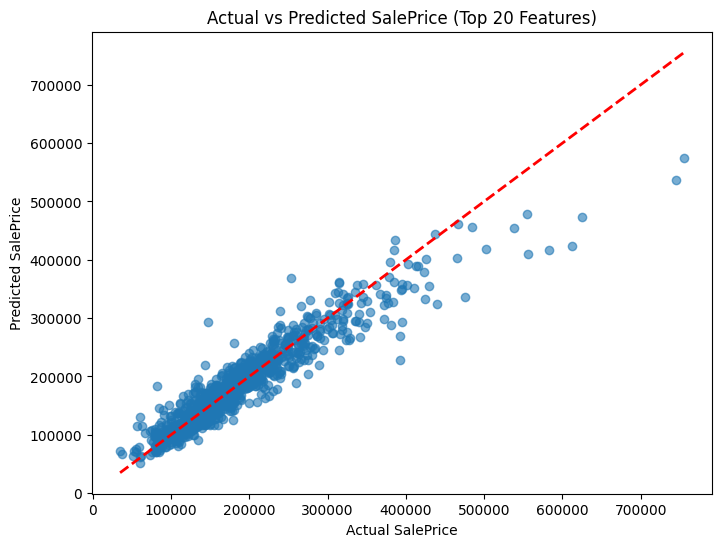

In [ ]:
import matplotlib.pyplot as plt

# Plot predicted vs actual SalePrice
plt.figure(figsize=(8, 6))
plt.scatter(y_train_actual, y_train_pred_actual, alpha=0.6)
plt.plot([y_train_actual.min(), y_train_actual.max()],
         [y_train_actual.min(), y_train_actual.max()], 'r--', linewidth=2)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice (Top 20 Features)")
plt.show()

### 2.2. Random Forest

Top features: Index(['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'OpenPorchSF', 'TotalSF',
       'Foundation_PConc'],
      dtype='object')
RMSE (логарифм): 0.16023944706487567
RMSE (доллары): 25343.68291388205


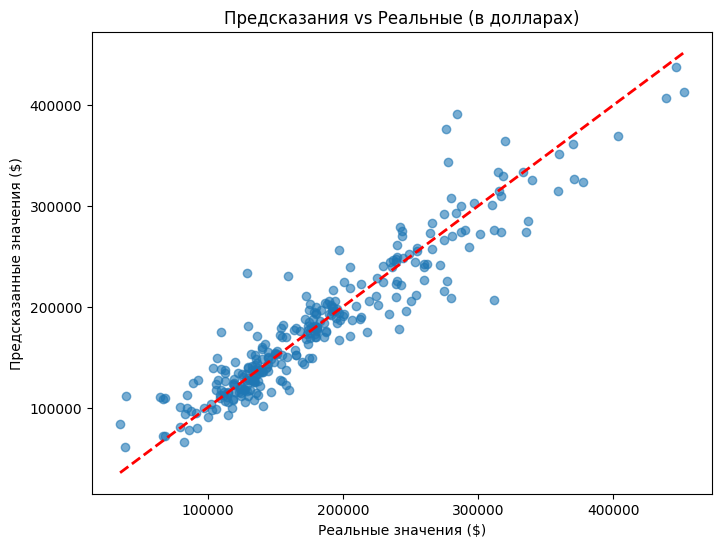

In [ ]:
# Code
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt
import numpy as np

# Копии данных
X_rf = train.copy()
y_rf = y_train.copy()

# Разделяем на train/test
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Селектор признаков
selector = SelectKBest(score_func=f_regression, k=20)
selector.fit(X_train_rf, y_train_rf)

top_features = X_train_rf.columns[selector.get_support()]
print("Top features:", top_features)

# Обучаем модель только на выбранных признаках
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train_rf[top_features], y_train_rf)

# Предсказания
pred = model.predict(X_test_rf[top_features])

# RMSE
rmse_log = root_mean_squared_error(y_test_rf, pred)  # RMSE на логарифмах
rmse_real = np.sqrt(np.mean((np.expm1(y_test_rf) - np.expm1(pred))**2))  # RMSE в $
print("RMSE (логарифм):", rmse_log)
print("RMSE (доллары):", rmse_real)


# График
plt.figure(figsize=(8,6))
plt.scatter(np.expm1(y_test_rf), np.expm1(pred), alpha=0.6)
plt.plot([np.expm1(y_test_rf).min(), np.expm1(y_test_rf).max()],
         [np.expm1(y_test_rf).min(), np.expm1(y_test_rf).max()],
         'r--', linewidth=2)
plt.xlabel("Реальные значения ($)")
plt.ylabel("Предсказанные значения ($)")
plt.title("Предсказания vs Реальные (в долларах)")
plt.show()
